<a href="https://colab.research.google.com/github/danielbauer1979/ML_656/blob/main/Module2_LinearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As always, let's start with importing the libraries:

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.linear_model import LogisticRegression 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn import neighbors

In [ ]:
np.random.seed = 1
sampsize = 100
mean = [66,175]
cov = [[7**2,0.5*7*25], [0.5*7*25, 25**2]]
X = np.random.multivariate_normal(mean, cov, sampsize)
beta_1 = 0.15
beta_2 = 0.03
probX = np.exp(beta_1 * (X[:,0] - 66) + beta_2 * (X[:,1] - 175))/(1+np.exp(beta_1 * (X[:,0] - 66) + beta_2 * (X[:,1] - 175)))
ISMALE = (probX > np.random.uniform(0,1,sampsize))
GenderDF1 = pd.DataFrame({'ISMALE':ISMALE,'HEIGHT': X[:,0], 'WEIGHT': X[:,1]})

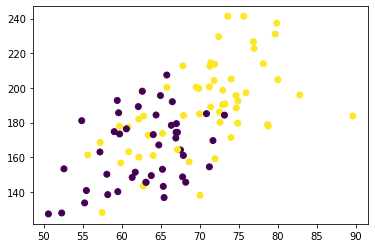

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(X[:,0], X[:,1], c= ISMALE)

In [ ]:
halfsampsize = 50
mean_M = [72,190]
mean_F = [60,160]
cov = [[7**2,0.5*7*25], [0.5*7*25, 25**2]]
X_M = np.random.multivariate_normal(mean_M, cov, halfsampsize)
X_F = np.random.multivariate_normal(mean_F, cov, halfsampsize)
X = np.concatenate((X_M, X_F), axis=0)
ISMALE = np.concatenate((np.ones(halfsampsize,dtype=bool), np.zeros(halfsampsize,dtype=bool)))
GenderDF2 = pd.DataFrame({'ISMALE':ISMALE,'HEIGHT': X[:,0], 'WEIGHT': X[:,1]})

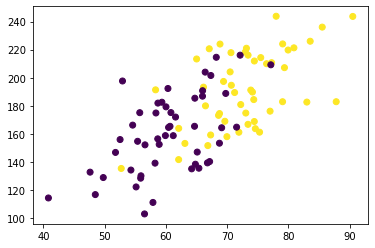

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(X[:,0], X[:,1], c= ISMALE)

In [ ]:
Train, Test = train_test_split(GenderDF1, test_size=0.5, random_state=1)

In [ ]:
logistic_model1 = LogisticRegression(fit_intercept=True).fit(Train[['HEIGHT','WEIGHT']],Train['ISMALE'])
print(logistic_model1.intercept_)
print(logistic_model1.coef_)

[-15.43702707]
[[0.10367424 0.04926049]]


In [ ]:
logistic_pred_1 = logistic_model1.predict(Test[['HEIGHT','WEIGHT']])
confusion_matrix(Test['ISMALE'],logistic_pred_1)

array([[14,  8],
       [ 8, 20]])

In [ ]:
precision_score(Test['ISMALE'],logistic_pred_1)

In [ ]:
lda_model_1 = LinearDiscriminantAnalysis()
lda_model_1.fit(Train[['HEIGHT','WEIGHT']],Train['ISMALE'])
lda_pred_1 = lda_model_1.predict(Test[['HEIGHT','WEIGHT']])
confusion_matrix(Test['ISMALE'],lda_pred_1)

array([[14,  8],
       [ 8, 20]])

In [ ]:
Train, Test = train_test_split(GenderDF2, test_size=0.5, random_state=1)
logistic_model2 = LogisticRegression(fit_intercept=True).fit(Train[['HEIGHT','WEIGHT']],Train['ISMALE'])
logistic_pred_2 = logistic_model1.predict(Test[['HEIGHT','WEIGHT']])
confusion_matrix(Test['ISMALE'],logistic_pred_2)

array([[22,  6],
       [ 3, 19]])

In [ ]:
lda_model_2 = LinearDiscriminantAnalysis()
lda_model_2.fit(Train[['HEIGHT','WEIGHT']],Train['ISMALE'])
lda_pred_2 = lda_model_2.predict(Test[['HEIGHT','WEIGHT']])
confusion_matrix(Test['ISMALE'],lda_pred_2)

array([[22,  6],
       [ 4, 18]])

In [ ]:
#!git clone https://github.com/danielbauer1979/ML_656.git

Cloning into 'ML_656'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 35 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (35/35), done.


In [ ]:
hw_data = pd.read_csv('ML_656/Davis.csv')
hw_data.head()

,Unnamed: 0,sex,weight,height,reportedWeight,reportedHeight
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


In [ ]:
hw_data['sex'] = pd.get_dummies(hw_data['sex'],drop_first=True)
hw_data.head()

,Unnamed: 0,sex,weight,height,reportedWeight,reportedHeight
0,1,1,77,182,77.0,180.0
1,2,0,58,161,51.0,159.0
2,3,0,53,161,54.0,158.0
3,4,1,68,177,70.0,175.0
4,5,0,59,157,59.0,155.0


In [ ]:
Train, Test = train_test_split(hw_data, test_size=0.5, random_state=1)
logistic_model3 = LogisticRegression(fit_intercept=True).fit(Train[['height','weight']],Train['sex'])
logistic_pred_3 = logistic_model1.predict(Test[['height','weight']])
confusion_matrix(Test['sex'],logistic_pred_3)

array([[ 0, 60],
       [ 0, 40]])

In [ ]:
#Credit Card Defaults

In [ ]:
mydata = pd.read_csv('UCI_Credit_Card.csv', index_col=0)

In [ ]:
mydata.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
mydata.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
mydata['PAY_0'][mydata['PAY_0']>4] = 4
mydata['PAY_2'][mydata['PAY_2']>4] = 4
mydata['PAY_3'][mydata['PAY_3']>4] = 4
mydata['PAY_4'][mydata['PAY_4']>4] = 4
mydata['PAY_5'][mydata['PAY_5']>4] = 4
mydata['PAY_6'][mydata['PAY_6']>4] = 4

<ipython-input-16-3a6ac3aecd96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['PAY_0'][mydata['PAY_0']>4] = 4
<ipython-input-16-3a6ac3aecd96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['PAY_2'][mydata['PAY_2']>4] = 4
<ipython-input-16-3a6ac3aecd96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['PAY_3'][mydata['PAY_3']>4] = 4
<ipython-input-16-3a6ac3aecd96>:4: SettingWithCopyWarning: 
A value is trying t

In [ ]:
factor = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month']
mydata_numcols = mydata.drop(columns = factor)
mydata_faccols = mydata[factor].drop(columns = ['default.payment.next.month']).astype('category')
dummies = pd.get_dummies(mydata_faccols, drop_first=True)
mydata_numcols_sc_0 = scale(mydata_numcols)
mydata_numcols_sc = pd.DataFrame(data=mydata_numcols_sc_0, columns = mydata_numcols.columns, index = dummies.index)
mydata_sc = pd.concat([mydata_numcols_sc, dummies], axis = 1)
mydata_sc = pd.concat([mydata_sc, mydata['default.payment.next.month']], axis = 1)

In [ ]:
mydata.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
mydata = mydata.rename(columns={"default.payment.next.month": "default"})

In [ ]:
mydata.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.021733,-0.137533,-0.171533,-0.228233,-0.272967,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.098773,1.180310,1.172414,1.132542,1.098770,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


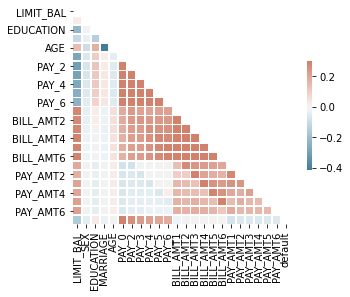

In [ ]:
mask = np.triu(np.ones_like(mydata.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mydata.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
mydata.insert(17, "BILL_AVG", (mydata['BILL_AMT1']+mydata['BILL_AMT2']+mydata['BILL_AMT3']+mydata['BILL_AMT4']+mydata['BILL_AMT5']+mydata['BILL_AMT6'])/6, True) 
mydata = mydata.rename(columns={"BILL_AMT1": "BILL_REC"})
del mydata['BILL_AMT2']
del mydata['BILL_AMT3']
del mydata['BILL_AMT4']
del mydata['BILL_AMT5']
del mydata['BILL_AMT6']
mydata.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_REC,BILL_AVG,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.021733,-0.137533,-0.171533,-0.228233,-0.272967,-0.297667,51223.330900,44976.945200,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.098773,1.180310,1.172414,1.132542,1.098770,1.117245,73635.860576,63260.721860,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-56043.166667,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,4781.333333,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21051.833333,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,57104.416667,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,964511.000000,877313.833333,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
mydata.to_csv('UCI_Credit_Card_prepped.csv') 

In [ ]:
train, test = train_test_split(mydata, test_size=0.25)

In [ ]:
g1 = smf.glm(formula='default ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + AGE + PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + BILL_REC + BILL_AVG + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6', data=train, family=sm.families.Binomial())
g1_res = g1.fit()
print(g1_res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                22500
Model:                            GLM   Df Residuals:                    22480
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10449.
Date:                Sat, 17 Oct 2020   Deviance:                       20898.
Time:                        20:00:47   Pearson chi2:                 2.74e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6630      0.137     -4.833      0.0

In [ ]:
g1_pred = g1_res.predict(test)
g1_pred_labels = np.zeros(len(test))
g1_pred_labels[g1_pred >0.5] = 1
confusion_matrix(test['default'], g1_pred_labels)

array([[5688,  174],
       [1235,  403]])

In [ ]:
#TPR
confusion_matrix(test['default'], g1_pred_labels)[1,1]/(confusion_matrix(test['default'], g1_pred_labels)[1,0] + confusion_matrix(test['default'], g1_pred_labels)[1,1]) 

0.24603174603174602

In [ ]:
#TNR
confusion_matrix(test['default'], g1_pred_labels)[0,0]/(confusion_matrix(test['default'], g1_pred_labels)[0,0] + confusion_matrix(test['default'], g1_pred_labels)[0,1]) 

0.970317297850563

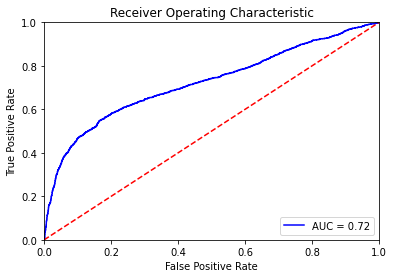

In [ ]:
fpr, tpr, threshold = roc_curve(test['default'], g1_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
X = train.drop(columns=['default'])
y = train['default']
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
lda_pred = clf.predict(test.drop(columns=['default']))

In [ ]:
lda_pred_labels = np.zeros(len(test))
lda_pred_labels[lda_pred >0.5] = 1
confusion_matrix(test['default'], lda_pred_labels)

array([[5668,  194],
       [1194,  444]])